<a href="https://colab.research.google.com/github/HerraKaava/tensorflow/blob/main/NN-Regression/Basic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>The major steps in modelling with TensorFlow</h1>

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model to try and find patterns between the features and the labels.

Note. There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a continuous (output) variable based on some combination of (explanatory) variables.

<br>

In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
print(tf.__version__)

2.15.0


<h3>Creating sample regression data</h3>




In [8]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

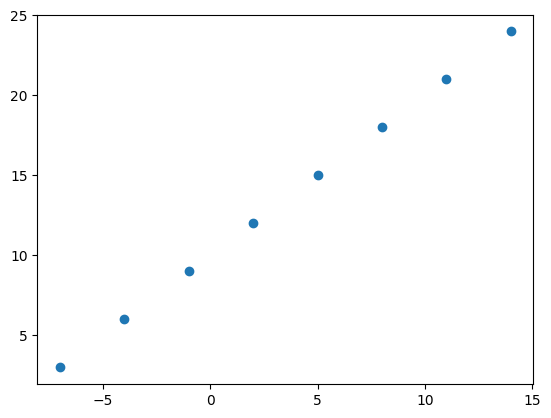

In [9]:
# Visualize the relationship between X and y
plt.scatter(X, y);

In [11]:
(y == X+10).all()

True

<br>

<h3>Input and output shapes</h3>

In [13]:
# Create demo tensors for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [34]:
# Convert our numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [35]:
X.ndim

1

In [36]:
X.shape

TensorShape([8])

In [37]:
tf.expand_dims(X, axis=1).shape

TensorShape([8, 1])

In [38]:
tf.expand_dims(X, axis=-1).shape

TensorShape([8, 1])

<br>

<h3>Creating our first NN regression model</h3>

In [40]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 379ms/step - loss: 10.1379 - mae: 10.1379
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 10.0054 - mae: 10.0054
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 9.8729 - mae: 9.8729
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 9.7404 - mae: 9.7404
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 9.6079 - mae: 9.6079


* When first running the tf model, I got the following error: "Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)"
* This is because X has shape (8,), which corresponds to ndim=1.
* As the error message is saying, the minimum amount of dimensions that the input vector/matrix has to have is 2 (min_ndim=2).
* This means that if you're training your NN using only one feature, you need to reshape it to have two dimensions.
* This can be done with: tf.expand_dims(X, axis=1).
* The axis argument tells along which dimension the dimension expansion should be performed.

* Notice how on each epoch (an epoch in machine learning means one complete pass of the training dataset through the algorithm) the MAE (loss function) gets smaller.

* Note that currently this model has no hidden layers (it only has an input layer and an output layer).
* If no activation function is added to the output layer *tf.keras.layers.Dense(1)*, then on default, the activation function is *None*, which means that the output layer will use a linear activation function (the output will be a linear combination of the input features plus a bias term).

In [43]:
# Make a prediction x=17 with our model.
# Since the relationship between X and y is that yi=Xi+10,
# then ideally, the predicted value for y, given x=17,
# should be 17+10=27.
model.predict([17.0])

1/1 [==============================] - 0s 43ms/step


array([[19.35502]], dtype=float32)

* Not a good prediction, but notice that on the last training round (Epoch 5/5), the MAE is 9.6079.
* This means that, on average, the prediction is off by 9.6079.

In [45]:
model.predict([17.0]) + 9.6079

1/1 [==============================] - 0s 51ms/step


array([[28.962921]], dtype=float32)

* This is somewhat close to 27, as it should be.

<br>

<h3>Improving our model</h3>

Once again, the steps in modelling with TensorFlow:

1. Construct or import a pretrained model relevant to your problem.

2. Compile the model (prepare it to be used with the training data).
  * Loss – how wrong your model's predictions are compared to the true labels (we want to minimize this).
  * Optimizer – how your model should update its internal patterns to improve its predictions.
  * Performance metrics – human interpretable values for how well your model is doing.

3. Fit the model to the training data so it can discover patterns.
  * Epochs – how many times the modell will go through all of the training examples.

4. Evaluate the model on the test data (how reliable are our model's predictions?).

We can improve our model by altering the steps we took to create the model.

1. **Creating the model** – here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling the model** – here we might change the optimization function or perhaps the *learning rate* of the optimization function.

3. **Fitting the model** – here we might fit the model with more *epochs* (train the model with the training data with more iterations), or increase the amount of training data fed to the model.

In [48]:
# Let's rebuild our model with epochs=5 --> epochs=100

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 707ms/step - loss: 12.7327 - mae: 12.7327
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6002 - mae: 12.6002
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.4677 - mae: 12.4677
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.3352 - mae: 12.3352
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 12.2027 - mae: 12.2027
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0702 - mae: 12.0702
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9377 - mae: 11.9377
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8052 - mae: 11.8052
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6727 - mae: 11.6727
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 11.5402 - mae: 11.5402
Epoch 11/100
1/1 [==============================

* Notice how the loss function (mae) gets smaller with each epoch.
* It is also worth noting that when we trained this exact same model with epochs=5, our mae was 9.6079.
* When we increase epochs from 5 to 100, the MAE decreased from 9.6079 $\, \boldsymbol{\rightarrow} \,$ 6.8644.

In [49]:
# Again, let's make a prediction with x=17.
# Since the relationship between X and y is yi=Xi+10,
# then ideally, the predicted value for y, given x=17, should be 17+10=27.
# Since on Epoch 100/100 mae=6.8644, the predicted value for y
# is off by 6.8644, on average.
# This means that we can expect our predicted value to be in range [27 - 6.86, 27 + 6.86].
model.predict([17.0])

1/1 [==============================] - 0s 227ms/step


array([[29.571836]], dtype=float32)

Let's change the model such that we add hidden layers with activation functions to it
* Fully connected layers: A *Dense* layer is a fully connected layer where each neuron receives input from all neurons of the previous layer.
* This property is useful for both hidden layers and output layers.

In [50]:
model = tf.keras.Sequential([

    # Hidden layers
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4845 - mae: 13.4845
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.0659 - mae: 13.0659
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6613 - mae: 12.6613
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.2651 - mae: 12.2651
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8425 - mae: 11.8425
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 11.3559 - mae: 11.3559
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.7842 - mae: 10.7842
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0904 - mae: 10.0904
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2146 - mae: 9.2146
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0783 - mae: 8.0783
Epoch 11/100
1/1 [==============================] - 0s 

* Notice when we added 3 hidden layers to the model, our loss function (mae) decrease from 6.8644 to 3.2258.
* Crazy!!!! Cool!!!

In [53]:
# Again, predict with x=17
model.predict([17.0])

1/1 [==============================] - 0s 47ms/step


array([[29.528141]], dtype=float32)

Let's see if the ADAM optimizer performs better than SGD.

In [56]:
model = tf.keras.Sequential([

    # Hidden layers
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.5443 - mae: 13.5443
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9611 - mae: 10.9611
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2768 - mae: 8.2768
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 4.5744 - mae: 4.5744
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 5.7895 - mae: 5.7895
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4567 - mae: 7.4567
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 6.3418 - mae: 6.3418
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 4.6798 - mae: 4.6798
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 3.7434 - mae: 3.7434
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 4.8728 - mae: 4.8728
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - 

* The loss function is again by far smaller (SGD vs. ADAM).
* Notice that these MAE values are the training losses.
* We might very well be *overfitting* to the training data when we, for example, add too many hidden layers.

Common ways to improve a deep learning model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate of the optimization function
* Fitting for longer (increasing the number of epochs)

**Important** note: the *learning rate* is potentially the most important hyperparameter you can tune to improve your NN model.

<br>

<h3>Performance evaluation</h3>

In practice, a typical workflow you'll go through when building a NN is:

* build a model $\, \boldsymbol{\rightarrow} \,$ fit it $\, \boldsymbol{\rightarrow} \,$ evaluate it $\, \boldsymbol{\rightarrow} \,$ tweak it $\, \boldsymbol{\rightarrow} \,$ fit it $\, \boldsymbol{\rightarrow} \,$ evaluate it $\, \boldsymbol{\rightarrow} \,$ tweak it $\, \boldsymbol{\rightarrow} \,$ fit it $\, \boldsymbol{\rightarrow} \,$ evaluate it ...

When it comes to performance evaluation, there are 3 words one should memorize:
* "visualize, visualize, visualize".

It's a good idea to visualize:
* the data – what kind of data are we working with? What does it look like?
* the model itself – what does our model look like?
* the training of a model – how does a model perform while it learns?
* the predictions of the model – how do the predictions of a model line up against the ground truth (true labels)?

In [61]:
# Make a bigger dataset
X = tf.range(-100, 101, 4)

# Let's say that the pattern we want our model to learn is y = X + 10
y = X + 10

In [69]:
X, y

(<tf.Tensor: shape=(51,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96,  100], dtype=int32)>,
 <tf.Tensor: shape=(51,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110],
       dtype=int32)>)

**Data splits:**
* Training set – the model learns from this data.
* Validation set – the model gets validated (evaluated) and tuned on this data $\, \boldsymbol{\rightarrow} \,$ prevent overfitting to the training data.
* Test set – the final model gets evaluated on this data $\, \boldsymbol{\rightarrow} \,$ evaluate how well does the model generalize to new, unseen data.

The motivation behind data splits are that we want to ensure that our model generalizes well on new, unseen data, and to prevent overfitting to the training data.

In [78]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X.numpy(),
                                                    y.numpy(),
                                                    test_size=0.2,
                                                    random_state=101)
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

* Notice that we cannot pass TensorFlow tensors into sklearn's *train_test_split()* function.
* NumPy arrays, however, can be passed into the *train_test_split()* function.
* Use the *numpy()* function that the TensorFlow tensors have $\, \boldsymbol{\rightarrow} \,$ pass the NumPy arrays into the *train_test_split()* function $\, \boldsymbol{\rightarrow} \,$ convert the output of *the train_test_split()* function back to TensorFlow tensors.

In [89]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 11, 11)

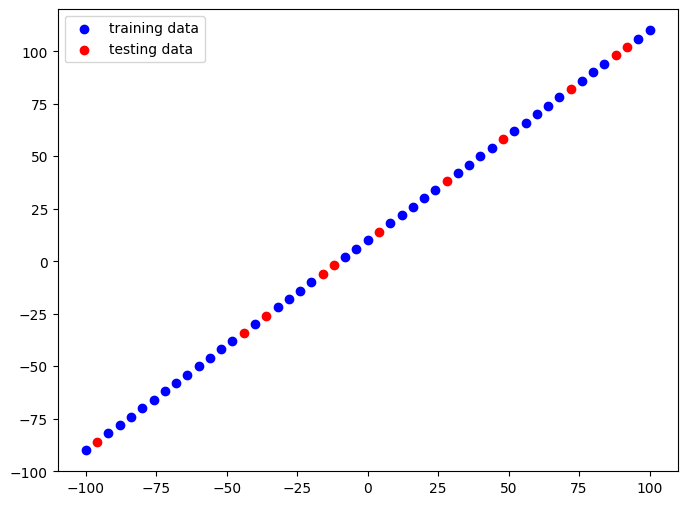

In [95]:
# Visualizing the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, c='b', label='training data')
plt.scatter(X_test, y_test, c='r', label='testing data')
plt.legend();

In [113]:
# Create a NN

# 1. Create a model
model = tf.keras.Sequential([

    # Input layer
    tf.keras.layers.Input(shape=(1,)),

    # Output layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

In [114]:
# Before fitting, let's visualize the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params – the total number of parameters in the model (i.e., the total number of *patterns* our model is going to try to learn within the relationship between X and y).

* Trainable params  – these are the parameters (patterns) the model can update as it trains.

* Non-trainable params – these parameters aren't updated during the training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).